In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

#csv içindeki ondalıklı sayılar virgül ile ayrıldığı için decimal="," parametresi kullanılmıştır. 
#bu parametre eklenmezse pandas verileri object olarak algılamaktadır.
df=pd.read_csv("drive/My Drive/ysa final/emotion1.csv",sep=";",decimal=",")
df.dropna(inplace=True)
print(df)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2548) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


     mean_0_a  mean_1_a  mean_2_a  ...  fft_748_b  fft_749_b     label
0        4.62      30.3    -356.0  ...    -162.00     280.00  NEGATIVE
1       28.80      33.1      32.0  ...     -31.60       2.57   NEUTRAL
2        8.90      29.4    -416.0  ...    -148.00     281.00  POSITIVE
3       14.90      31.6    -143.0  ...       9.53     -12.40  POSITIVE
4       28.30      31.3      45.2  ...      23.90     -17.60   NEUTRAL
..        ...       ...       ...  ...        ...        ...       ...
593     10.80      29.7    -403.0  ...     -78.80     449.00  POSITIVE
594     26.50      30.1      32.6  ...     -47.50      35.50   NEUTRAL
595      9.74      21.4      26.6  ...     -20.70     -17.30  POSITIVE
596      6.20      30.8    -569.0  ...    -269.00     599.00  POSITIVE
597     29.30      31.4      26.0  ...       1.19      -2.82   NEUTRAL

[598 rows x 2549 columns]


In [4]:
#label sütunu çıktı olarak y dizisine aktarılmıştır.
#n ve label sütunları ana datadan çıkartılıp x_data'ya aktarılmıştır.
df.label=[0 if each =='NEGATIVE' else 1 if each=='NEUTRAL' else 2 for each in df.label]
y=df.label.values
x_data=df.drop(["label"],axis=1)

In [5]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)) #data set normalize edildi.

In [6]:
#veri seti eğitim ve test verilerine bölünür.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (478, 2548)
y_train: (478,)
x_test: (120, 2548)
y_test: (120,)


In [7]:
#yapay sinir ağları mlp sınıflandırıcısı ile sınıflandırılır
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [8]:
print("mlpc score:",mlpc.score(x_test,y_test)) 

mlpc score: 0.925


In [9]:
#K-fold cross validation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [10]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=knn,X=x,y=y,cv=10)

for score in scores:
    print(score)
    
print("ortalama skor:",np.mean(scores))

0.95
0.8833333333333333
0.95
0.9166666666666666
0.9
0.9166666666666666
0.9333333333333333
0.9333333333333333
0.9152542372881356
0.847457627118644
ortalama skor: 0.9146045197740114


In [11]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))
x=x.to_numpy()
for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6666666666666666
0.5833333333333334
0.9


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.95
0.85
0.7


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7833333333333333
0.6166666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7796610169491526
0.6440677966101694
ortalama score: 0.7473728813559322


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))
try:
  x=x.to_numpy()
except:
  for train_indexler,test_indexler in kf.split(x):
      mlpc.fit(x[train_indexler],y[train_indexler])
      score=mlpc.score(x[test_indexler],y[test_indexler])
      scores.append(score)
      print(score)
    
  print("ortalama score:",np.mean(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9166666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8833333333333333
0.7
0.8833333333333333
0.9166666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9166666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9166666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6610169491525424
0.6271186440677966
ortalama score: 0.8288135593220337


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [13]:
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(activation="logistic",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 15.5min finished


In [25]:
 print(mlpc_cv_model.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}


In [26]:
mlpc_tuned=MLPClassifier(alpha=0.001,hidden_layer_sizes=(100,100),solver="lbfgs").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 0.9333333333333333


In [27]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

mlpc=MLPClassifier(alpha=0.1,hidden_layer_sizes=(100,100),solver="lbfgs",activation="tanh",max_iter=500).fit(x_train,y_train) 
y_pred=mlpc.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9333333333333333


In [28]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[32  0  1]
 [ 0 39  1]
 [ 4  2 41]]


In [29]:
f1=metrics.f1_score(y_test,y_pred,average='weighted')
print("f1 score:",f1)

f1 score: 0.9329119699409555


In [30]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.95      0.97      0.96        40
           2       0.95      0.87      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.93      0.93      0.93       120



In [31]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [32]:
y_pred=mlpc.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9333333333333333


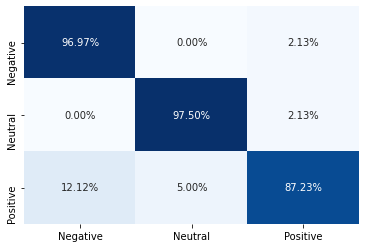

In [33]:
class_adlari=["Negative","Neutral","Positive"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv1D,MaxPool1D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [35]:
X=x_data.to_numpy()
print(X.shape)
x=X.reshape(X.shape[0],X.shape[1],1)
print(x.shape)

(598, 2548)
(598, 2548, 1)


In [36]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [37]:
input_shape=x_train.shape[1:]
print(input_shape)

(2548, 1)


In [50]:
model=Sequential()
model.add(Conv1D(15,kernel_size=3,activation="relu",padding="Same",input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Conv1D(30,kernel_size=3,activation="relu",padding="Same",input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Conv1D(45,kernel_size=3,activation="relu",padding="Same",input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Conv1D(60,kernel_size=3,activation="relu",padding="Same",input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dense(5,activation="softmax"))

In [51]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [52]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 2548, 15)          60        
_________________________________________________________________
batch_normalization_5 (Batch (None, 2548, 15)          60        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1274, 15)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1274, 15)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1274, 30)          1380      
_________________________________________________________________
batch_normalization_6 (Batch (None, 1274, 30)          120       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 637, 30)          

In [53]:
egitim=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
15/15 [==============================] - 2s 29ms/step - loss: 2.1631 - accuracy: 0.4343 - val_loss: 1.6338 - val_accuracy: 0.1833
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 1.2770 - accuracy: 0.6101 - val_loss: 1.3305 - val_accuracy: 0.5333
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 0.9940 - accuracy: 0.6172 - val_loss: 0.9959 - val_accuracy: 0.5167
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 1.0611 - accuracy: 0.6149 - val_loss: 0.9703 - val_accuracy: 0.5083
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 0.9410 - accuracy: 0.6212 - val_loss: 0.9689 - val_accuracy: 0.5000
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 0.8364 - accuracy: 0.6360 - val_loss: 0.9679 - val_accuracy: 0.5083
Epoch 7/100
15/15 [==============================] - 0s 11ms/step - loss: 0.7791 - accuracy: 0.6728 - val_loss: 0.9906 - val_accuracy: 0.5000
Epoch 

0.6549999982118606


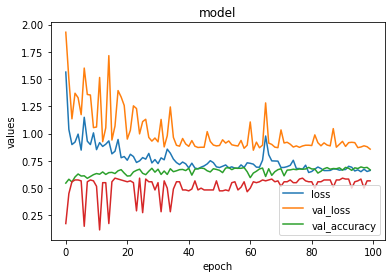

In [49]:
#print(egitim.history)
plt.plot(egitim.history["loss"])
plt.plot(egitim.history["val_loss"])
plt.plot(egitim.history["accuracy"])
plt.plot(egitim.history["val_accuracy"])
meanAcc=np.array(egitim.history["accuracy"]).mean()
print(meanAcc)
plt.title('model')
plt.ylabel('values')
plt.xlabel('epoch')
plt.legend(['loss','val_loss','val_accuracy'],loc='lower right')
plt.show()